A partir de la matriz de adyacencia de un grafo y un conjunto de posiciones relacionadas a los nodos de éste, se pretende construir un grafo, donde los pesos de las aristas representan la distancia euclideana en 2D entre cada par de nodos.

''

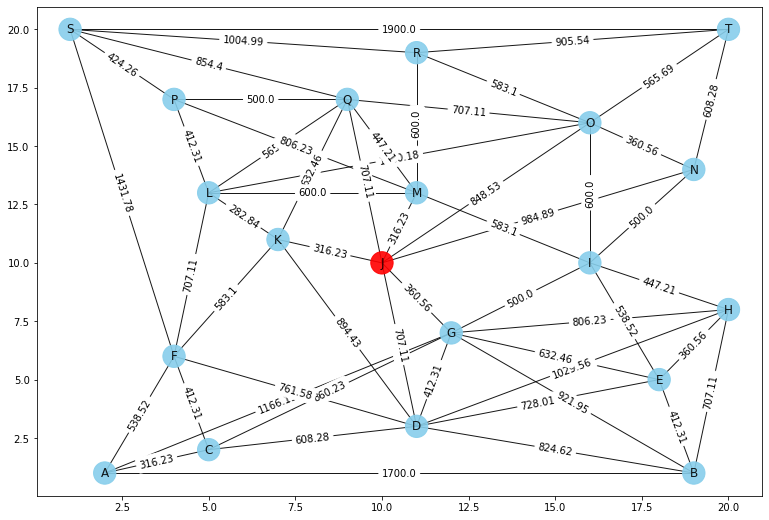

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math 

posiciones = pd.read_csv('Grafo01.csv',delimiter=';',header=None,index_col=[1,2]) 
adyacencia = pd.read_csv('Adyacencia.csv',delimiter=';',header=None, index_col=0)

G = nx.Graph(adyacencia.values) 
dic=dict(zip(list(G.nodes()),list(adyacencia.index))) 
dic2=dict(zip(list(adyacencia.index),list(posiciones.index)))
G=nx.relabel_nodes(G,dic)
nx.set_node_attributes(G, dic2, 'posiciones')

dict_nodos_posiciones=nx.get_node_attributes(G, 'posiciones')

lista=[]
lista1=[]
for e in G.edges:
    lista=[]
    for i in e:
        lista.append(dict_nodos_posiciones[i])
    lista1.append(lista)
m=0
for i in lista1:
    i=round(math.sqrt(math.pow((i[0][0]*100)-(i[1][0]*100),2)+math.pow((i[0][1]*100)-(i[1][1]*100),2)),2)
    lista1[m]=i
    m=m+1
dic3=dict(zip(list(e for e in G.edges),lista1))
nx.set_edge_attributes(G, dic3, 'distancia') 
color_map=[]
for node in G:
    if node == 'J':
        color_map.append('red')
    else: 
        color_map.append('skyblue')
pos = dic2
fig, ax = plt.subplots(figsize=(13,9))
nx.draw(G,pos,ax=ax,label="A beautiful city",node_color=color_map,node_size=500,alpha=0.9,labels={node:node for node in G.nodes()})
labels = nx.get_edge_attributes(G,'distancia')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
limits=plt.axis('on') # turns on axis
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
;